Analysis

In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data into a single DataFrame based on 'Mouse ID'
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
print(combined_data)

# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")

# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Optional: Get all the data for the duplicate mouse ID. 
print("Duplicate Mouse ID:")
print(duplicate_mice['Mouse ID'].unique())

# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_data['Mouse ID'].nunique()
print(f"Number of mice in clean DataFrame: {num_mice_clean}")


     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

Total is 249

NOTES:

Contents
Mean (arithmetic mean): statistics.mean()
Median: statistics.median(), statistics.median_low(), statistics.median_high()
Mode: statistics.mode(), statistics.multimode()
Variance
Population variance: statistics.pvariance()
Sample variance: statistics.variance()
Standard deviation
Population standard deviation: statistics.pstdev()
Sample standard deviation: statistic

Source: https://note.nkmk.me/en/python-statistics-mean-median-mode-var-stdev/

Valuable for Summ statisticss.stdev()

Summary statistics

In [87]:
# Using groupby and summary statistical methods
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std'])

# Calculate SEM separately
summary_stats['SEM'] = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Rename the columns for better clarity
summary_stats = summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation'})

# Display the summary statistics table
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.393463  50.909965  43.138803            6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


sem() error solved:

The sem() function calculates the standard error of the mean (SEM) for a given set of data. The standard error of the mean is a measure of how much the sample mean is likely to vary from the population mean. It's particularly useful when you have a sample and want to estimate how much the sample mean might vary if you were to take multiple samples from the same population.

In the context of this code snippet, clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem() calculates the SEM of the 'Tumor Volume (mm3)' column for each group (each drug regimen) defined by the 'Drug Regimen' column. So, for each drug regimen, it computes the standard error of the mean of tumor volume across all mice under that regime Source: OpenAI





Bar and Pie Charts

USE:

import numpy as np
import matplotlib.pyplot as plt 
 
  
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30, 
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different co

From source: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/urses")
plt.show()

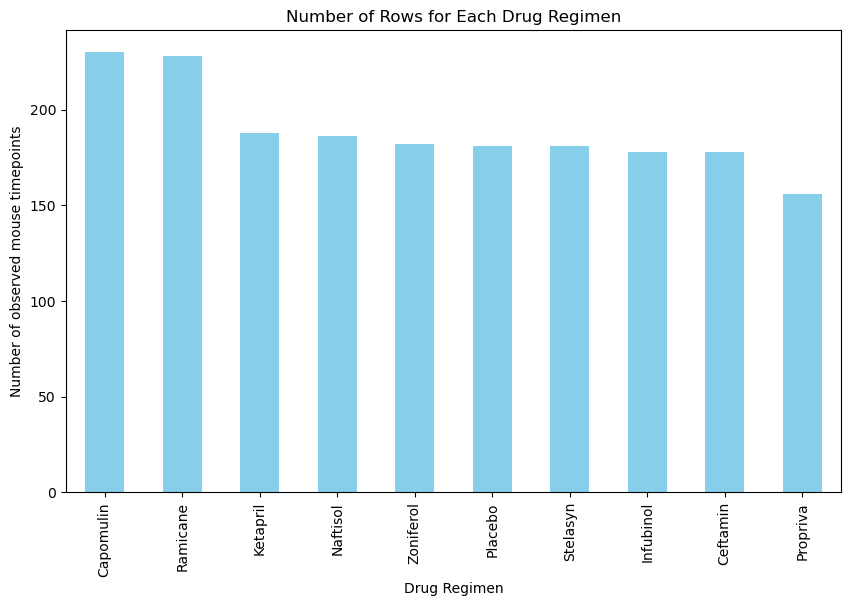

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Calculate the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Plot the bar plot
regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Set the title and labels
plt.title('Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse timepoints')

# Display the plot
plt.show()


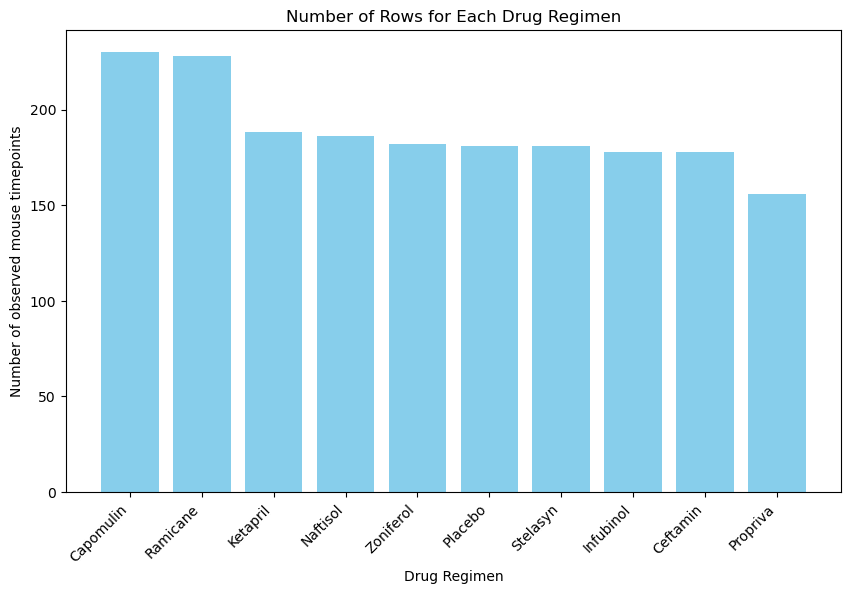

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt

# Calculate the number of rows for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Get the drug regimens and corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue')

# Set the title and labels
plt.title('Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of observed mouse timepoints')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


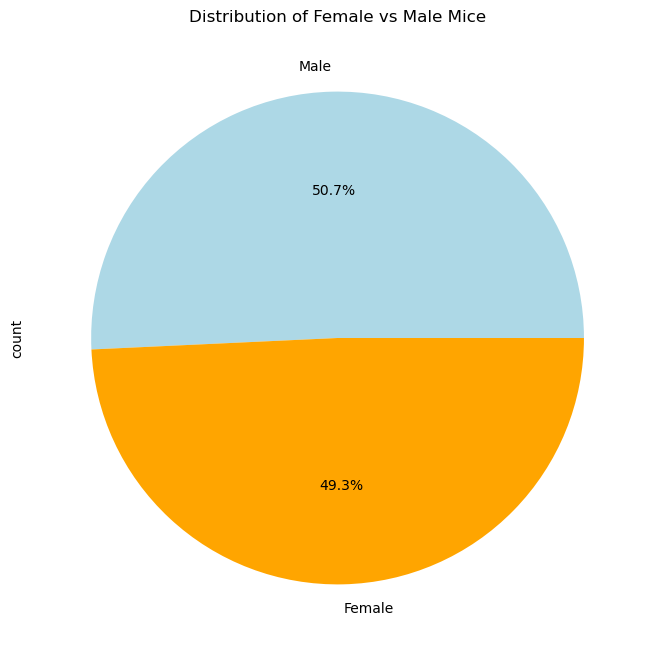

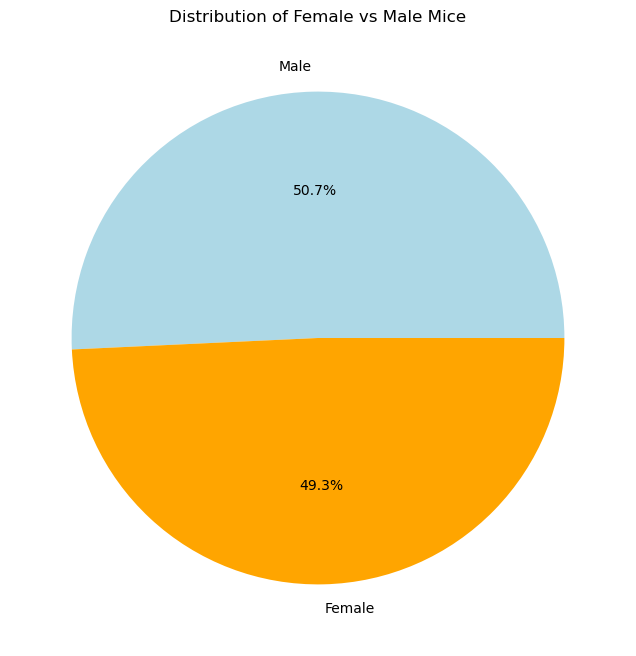

In [90]:
# Plot the pie plot using Pandas with custom colors and rounded percentages
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'orange'], figsize=(8, 8))

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()

# Plot the pie plot using pyplot with custom colors and rounded percentages
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'orange'])

# Set the title
plt.title('Distribution of Female vs Male Mice')

# Display the plot
plt.show()


Quartlies, outliersa, and boxplots

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


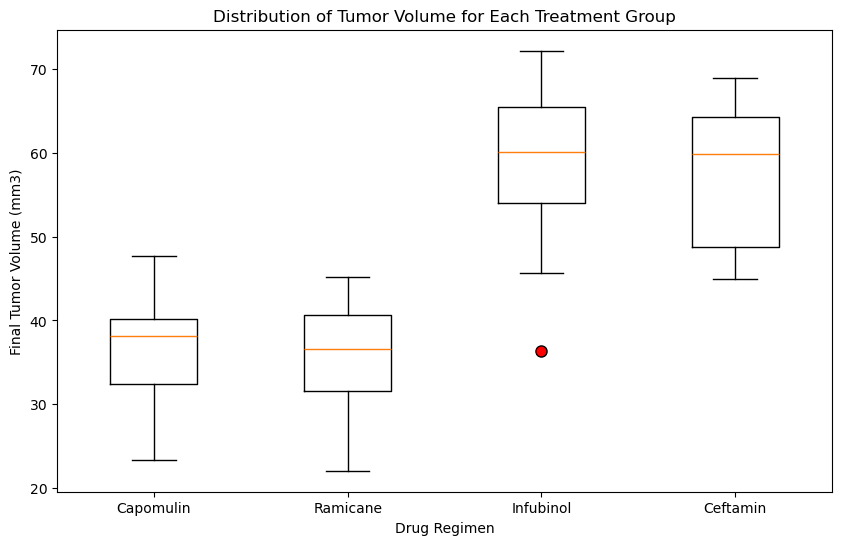

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_per_mouse = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoint_per_mouse, clean_data, on=['Mouse ID', 'Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Loop through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_volume_data.append(tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    potential_outliers = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    
    # Print potential outliers for each treatment
    print(f"{treatment}'s potential outliers: {potential_outliers}")

# Generate a box plot that shows the distribution of the tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(marker='o', markersize=8, markerfacecolor='red', linestyle='none'))
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


Line and Scatter Plots

No data found for mouse ID 'Mouse_ID_of_Interest' treated with Capomulin.


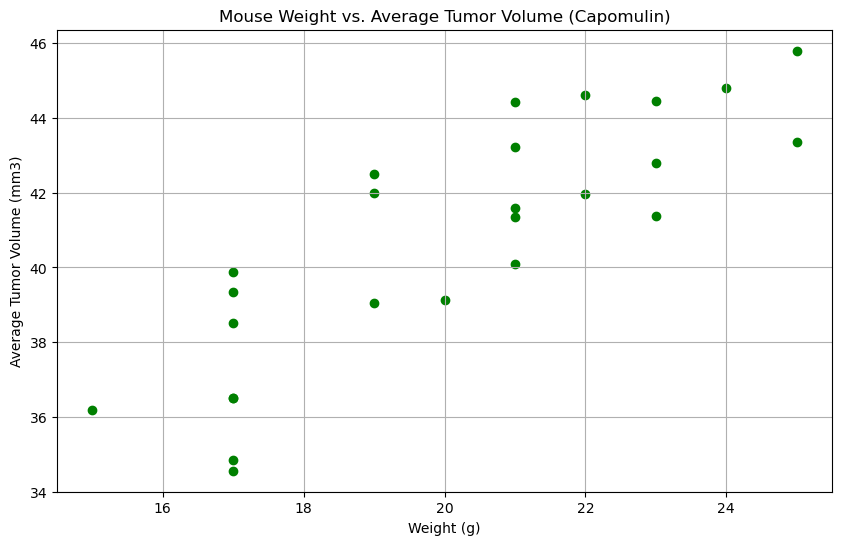

No data found for mouse ID 'Mouse_ID_of_Interest' treated with Capomulin.


In [92]:
# Import necessary libraries
import matplotlib.pyplot as plt

#plt.scatter(dates,values)
#plt.show()

#Not wokring in my case Source: https://stackoverflow.com/questions/20130227/how-to-connect-scatterplot-points-with-line-using-matplotlib

# Choose a single mouse treated with Capomulin
mouse_id_of_interest = 'Mouse_ID_of_Interest'  # Replace with an actual mouse ID from your dataset
single_mouse_data = clean_data.loc[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id_of_interest)]

# Check if data for the selected mouse ID and Capomulin treatment exists
if single_mouse_data.empty:
    print(f"No data found for mouse ID '{mouse_id_of_interest}' treated with Capomulin.")
else:
    # Generate a line plot of tumor volume vs. time point for the chosen mouse
    plt.figure(figsize=(10, 6))
    plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
    plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id_of_interest} (Capomulin)')
    plt.xlabel('Time Point')
    plt.ylabel('Tumor Volume (mm3)')
    plt.grid(True)
    plt.show()

# Calculate the average observed tumor volume for each mouse treated with Capomulin
average_tumor_volume = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='green')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# Import necessary libraries
import matplotlib.pyplot as plt

# Choose a single mouse treated with Capomulin
mouse_id_of_interest = 'Mouse_ID_of_Interest'  # Replace with the actual mouse ID
single_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id_of_interest)]

# Check if data for the selected mouse ID and Capomulin treatment exists
if single_mouse_data.empty:
    print(f"No data found for mouse ID '{mouse_id_of_interest}' treated with Capomulin.")
else:
    # Generate a line plot of tumor volume vs. time point for the chosen mouse
    plt.figure(figsize=(10, 6))
    plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='blue')
    plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id_of_interest} (Capomulin)')
    plt.xlabel('Time Point')
    plt.ylabel('Tumor Volume (mm3)')
    plt.grid(True)
    plt.show()



Correlation and Regression

In [93]:
# Import necessary libraries
import scipy.stats as st

# Calculate the average observed tumor volume for each mouse treated with Capomulin
average_tumor_volume = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weights
mouse_weights = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient = st.pearsonr(mouse_weights, average_tumor_volume)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Print correlation coefficient
print(f"Correlation Coefficient: {correlation_coefficient}")

# Print linear regression results
print(f"Linear Regression - Slope: {slope}, Intercept: {intercept}, R-value: {r_value}, P-value: {p_value}, Standard Error: {std_err}")


Correlation Coefficient: 0.8419363424694719
Linear Regression - Slope: 0.9544396890241048, Intercept: 21.552160532685008, R-value: 0.8419363424694721, P-value: 1.3225722434712404e-07, Standard Error: 0.12754359033201323


Correlation Coefficient: 0.8419363424694719